In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import random

In [ ]:
data = pd.read_csv('Data.csv')
data.head()
# Normalization using Min Max Scaler
scaler = MinMaxScaler()

scaler.fit(data[['age']])
data['age'] = scaler.transform(data[['age']])

scaler.fit(data[['salary']])
data['salary'] = scaler.transform(data[['salary']])

data.head()

,id,age,sex,region,salary,married,children,car
0,ID12101,0.612245,FEMALE,INNER_CITY,0.215634,NO,1,NO
1,ID12102,0.448980,MALE,TOWN,0.431395,YES,3,YES
2,ID12103,0.673469,FEMALE,INNER_CITY,0.198933,YES,0,YES
3,ID12104,0.102041,FEMALE,TOWN,0.264320,YES,3,NO
4,ID12105,0.795918,FEMALE,RURAL,0.783987,YES,0,NO


In [ ]:
corr = data.corr()
print(corr)

               age    salary  children
age       1.000000  0.752726  0.023572
salary    0.752726  1.000000  0.036761
children  0.023572  0.036761  1.000000


In [ ]:
x = data['age']
y = data['salary']
print("No. of Null Values :",len(data.isnull()) - len(data))

No. of Null Values : 0


Text(0.5, 1.0, 'Age Histogram')

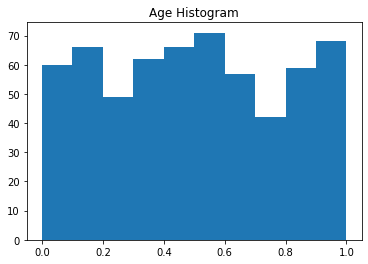

In [ ]:
plt.hist(x)
plt.title('Age Histogram')

Text(0.5, 1.0, 'Salary Histogram')

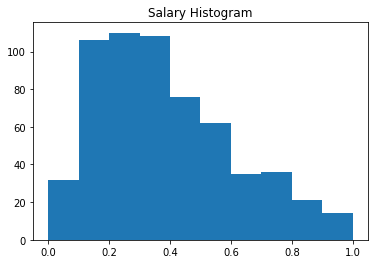

In [ ]:
plt.hist(y)
plt.title('Salary Histogram')

In [ ]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  return outliers

print("No. of Outliers :",len(find_outliers_IQR(data)) - len(data))

No. of Outliers : 0


<ipython-input-9-c8b75bf92f9b>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


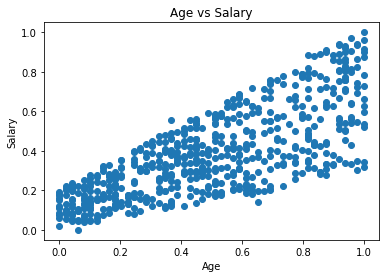

In [ ]:
x = data['age']
y = data['salary']
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

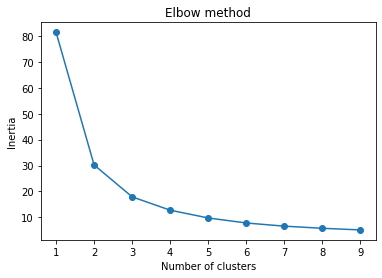

In [ ]:
# Checking Total Clusters
df = list(zip(x, y))
inertias = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


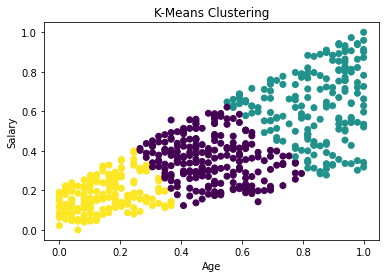

In [ ]:
# K - Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
plt.scatter(x, y, c=kmeans.labels_)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
#Calculating SSE and SSB
X = data[['age','salary']]
centroids=kmeans.cluster_centers_
labels=kmeans.labels_
sse=0 #sum of squared error in the cluster
ssb=0 #sum of squared error between the cluster
for i in range(len(X)):
 sse+=((X.iloc[i,0]-centroids[labels[i],0])**2)+((X.iloc[i,1]-centroids[labels[i],1])**2)
for i in range (len(centroids)):
 ssb+=len(X[labels==i])*(((centroids[i,0]-centroids[:,0].mean())**2)+((centroids[i,1]-centroids[:,1].mean())**2))
print('SSE:',sse)
print('SSB:',ssb)
#calculating silhouette coefficient value
silhouette_coefficient=silhouette_score(X,labels)
print('Silhouette Coefficient:',silhouette_coefficient)

SSE: 17.921141663451692
SSB: 63.50277689998506
Silhouette Coefficient: 0.45463038228367225


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'Dendrogram Single Linkage')

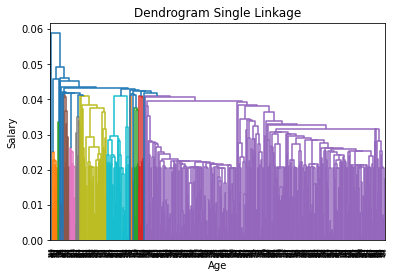

In [ ]:
# Hierarchical Clustering (Single Link)

X = data.iloc[:, [1, 4]].values
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
y_agg = agg_clustering.fit_predict(X)

dendrogram = sch.dendrogram(sch.linkage(X, method='single'))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.title('Dendrogram Single Linkage')

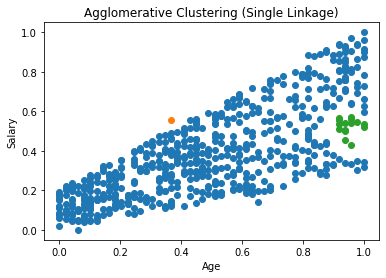

In [ ]:
plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1])
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1])
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1])
plt.title('Agglomerative Clustering (Single Linkage)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'Dendrogram Complete Linkage')

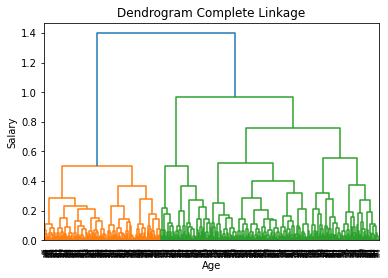

In [ ]:
# Hierarchical Clustering (Complete Link)

X = data.iloc[:, [1, 4]].values
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_agg = agg_clustering.fit_predict(X)

dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.title('Dendrogram Complete Linkage')

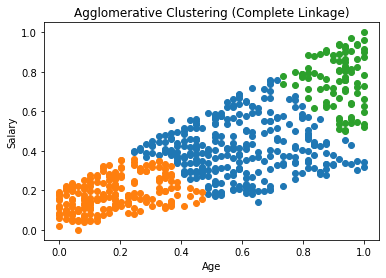

In [ ]:
plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1])
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1])
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1])
plt.title('Agglomerative Clustering (Complete Linkage)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'Dendrogram Average Linkage')

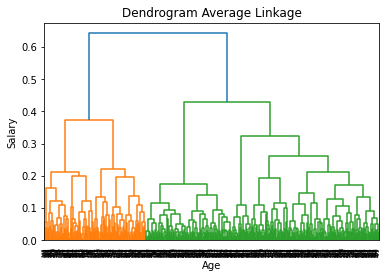

In [ ]:
# Hierarchical Clustering (Average Link)

X = data.iloc[:, [1, 4]].values
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
y_agg = agg_clustering.fit_predict(X)

dendrogram = sch.dendrogram(sch.linkage(X, method='average'))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.title('Dendrogram Average Linkage')

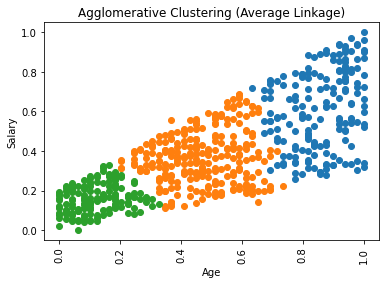

In [ ]:
plt.scatter(X[y_agg == 0, 0], X[y_agg == 0, 1])
plt.scatter(X[y_agg == 1, 0], X[y_agg == 1, 1])
plt.scatter(X[y_agg == 2, 0], X[y_agg == 2, 1])
plt.title('Agglomerative Clustering (Average Linkage)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

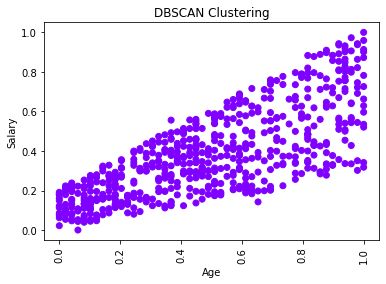

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples=10)
dbscan.fit(X)
labels = dbscan.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xticks(rotation = 90)
plt.show()

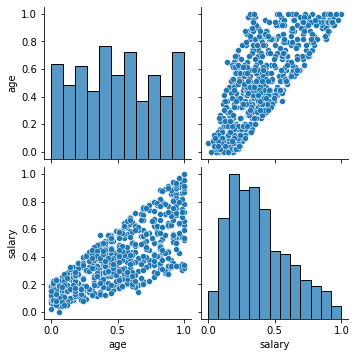

In [ ]:
sns.pairplot(data[['age','salary']])